In [4]:
kustoDf  = spark.read \
            .format("com.microsoft.kusto.spark.synapse.datasource") \
            .option("spark.synapse.linkedService", "adx") \
            .option("kustoDatabase", "adxdb") \
            .option("kustoQuery", "StormEvents_1 | take 10") \
            .load()

display(kustoDf) 


StatementMeta(sparkling, 3, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, ed8825cf-96e7-4ac1-b287-1ade3621ba91)

In [20]:
stormDf  = spark.read \
            .format("com.microsoft.kusto.spark.synapse.datasource") \
            .option("spark.synapse.linkedService", "adx") \
            .option("kustoDatabase", "adxdb") \
            .option("kustoQuery", "StormEvents_1") \
            .load()

from pyspark.sql.functions import *

filtered_df = stormDf.select('EventId', 'State', 'StartTime','EndTime', 'EventType', 'DamageProperty', 'DeathsDirect', 'Source') \
                            .filter((stormDf.DamageProperty > 0)\
                                & (stormDf.DeathsDirect > 0))

filtered_df.createOrReplaceTempView("storm_dataset")

StatementMeta(sparkling, 3, 20, Finished, Available)

StatementMeta(sparkling, 3, 14, Finished, Available)

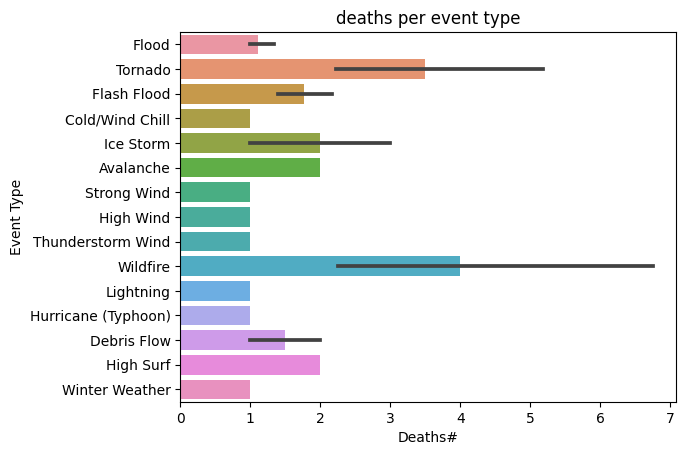

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = filtered_df.toPandas()

ax = sns.barplot(x="DeathsDirect", y="EventType",data=filtered_df)
ax.set_title('deaths per event type')
ax.set_xlabel('Deaths#')
ax.set_ylabel('Event Type')
plt.show()

In [22]:
%%sql

SELECT EventType, AVG(DamageProperty) AS avg_property_damage
FROM storm_dataset 
GROUP BY EventType
ORDER BY avg_property_damage DESC

StatementMeta(sparkling, 3, 22, Finished, Available)

<Spark SQL result set with 15 rows and 2 fields>

In [23]:
%%sql

SELECT 
    State
    , MAX(DeathsDirect) AS deaths
FROM storm_dataset 
GROUP BY State
ORDER BY deaths DESC

StatementMeta(sparkling, 3, 23, Finished, Available)

<Spark SQL result set with 29 rows and 2 fields>